In [ ]:
# day05 PPT / p.20부터 ₩

# programming Setting 
- 프로그램의 설정 값을 만들어 주고 싶다면?
- (1) 실행할때마다 필요한 설정 값 
    - 딥러닝 학습 횟수(Epoch), 학습계수(Learning rate), 사용하는 GPU 갯수 등등 
    - Command Line Argument(명령행인자)로 입력한다. 
    
- (2) 한번 설명하면 수정을 잘 안하는 설정 값 
    - 학습자료 폴더위치, 웹서버의 Listening port 등등
    - 설정 파일에서 불러들인다. 

# Command Line Argument 
- 콘솔창에서 프로그램 실행 시 프로그램에 넘겨주는 인자 값
- CLI(Command Line Interfate)에서 흔히 쓰이는 방식
- 파이썬에선 sys라이브러리의 arvs 속성으로 접근한다.
- 공백기준으로 잘라져 문자열 형태로 입력 

In [1]:
import sys

print(sys.argv)

['/opt/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py', '-f', '/Users/master90/Library/Jupyter/runtime/kernel-8e461ef3-1787-4b2a-ab2b-83510a56350f.json']


# argparser 
- argparser 라이브러리를 활용
- 인자 flag를 설정 가능하여 flag별 입력 가능 (긴 flag, 짧은 flag 활용)
- 기본값 설정 가능
- type설정 가능(문자열에서 변환)
- help제공하여 사용자 편의 향상
- 이외 명령 줄 인자와 관련된 여러도구 포함 

In [4]:
import argparse 

parser = argparse.ArgumentParser()

#parser.add_argument(<짧은플래스>,<긴플래스>)
parser.add_argument('-l','--left',type=int) # 타입설정
parser.add_argument('-r','--right',type=int)
parser.add_argument(
    '--operation',
    dest = 'op',# 타겟속성, 기본은 -- 없이
    help = 'Set Operation', # 인자 설명
    default = 'sum' # 기본값 
)

args = parser.parse_args()
print(args)

if args.op == 'sum':
    out = args.left + args.right
elif args.op =='sub':
    out = args.left - args.right
    
print(out)

usage: ipykernel_launcher.py [-h] [-l LEFT] [-r RIGHT] [--operation OP]
ipykernel_launcher.py: error: unrecognized arguments: -f /Users/master90/Library/Jupyter/runtime/kernel-8e461ef3-1787-4b2a-ab2b-83510a56350f.json


SystemExit: 2

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# config File 
- 프로그램 실행 설정을 파일에 저장함
- Section, Key, Value 값의 형태 
    - [Section] - 설정범주
    - Key : Value - 키 : 값
    - [DEFAULT] - 기본범주
- 이중 딕셔너리 형태 - 모든 Key, Value 가 str  

In [5]:
# Q.  예시보면 확장자가  cfg로 되어있네? 

# Config Parser 
- configparser 라이브러리를 활용 
- 파이썬 기본 딕셔너리처럼 사용
- 기본적으로 모든건 str 타입으로 처리 

In [ ]:
# test.cfg 저건 어떤거 관련 설정파일인지는 모르겠지만 

In [21]:
import configparser 

config = configparser.ConfigParser()
config.read('./test.cfg')

print(config.sections()) # 모든범주 불러오기 

port = config['topsecret.server.com']['port']
print(type(port), port) # (str, 50022)

port = config['topsecret.server.com'].getint('port')
print(type(port),port) # (int, 5002)

for name, section in config.items(): # 딕셔너리처럼 접근 
    print('[-]name : ',name)
    print('[-]section : ',section)
    for key, value in section.items(): # 딕셔너리처럼 접근 
        print('\t[-] key, value : ',key, value)
        
with open('./test.cfg','w') as fd : #설정 저장 
    config.write(fd)

['bitbucket.org', 'topsecret.server.com']
<class 'str'> 50022
<class 'int'> 50022
[-]name :  DEFAULT
[-]section :  <Section: DEFAULT>
	[-] key, value :  serveraliveinterval 45
	[-] key, value :  compression yes
	[-] key, value :  compressionlvel 9
	[-] key, value :  forwardx11 yes
[-]name :  bitbucket.org
[-]section :  <Section: bitbucket.org>
	[-] key, value :  user hg
	[-] key, value :  serveraliveinterval 45
	[-] key, value :  compression yes
	[-] key, value :  compressionlvel 9
	[-] key, value :  forwardx11 yes
[-]name :  topsecret.server.com
[-]section :  <Section: topsecret.server.com>
	[-] key, value :  port 50022
	[-] key, value :  forwardx11 no
	[-] key, value :  serveraliveinterval 45
	[-] key, value :  compression yes
	[-] key, value :  compressionlvel 9


In [ ]:
# config.sections 할때 모든 범주 불러오기인데 디폴트는 왜 안불러오지?


# Exception Handling 
- 프로그램 실행 중에는 다양한 예외/에러가 발생한다.
- 예외가 발생할 경우 대응 조치가 필요하다
    - 불러올 파일이 없는 경우 : 파일이 없음을 사용자에게 알림
    - 서버와 연결이 끊김 : 다른 서버로 리다이렉트 
- 예외가 발생할 수 있는 코드 → (특정 예외 발생시) 대응코드 → 계속진행
```
try:
    예외 발생 가능 코드
except [예외클래스]:
    대응코드
```

# Exception Handling Example
- 0으로 숫자를 나누었을 때 예외 처리하기 

In [25]:
for i in range(-5,5):
    print(10/i)

-2.0
-2.5
-3.3333333333333335
-5.0
-10.0


ZeroDivisionError: division by zero

In [27]:
for i in range(-5,5):
    try :
        print(10/i)
    except ZeroDivisionError: # 0으로 나눌 시 에러발생 
        print('ZeroDivisionError, skip the number')

-2.0
-2.5
-3.3333333333333335
-5.0
-10.0
ZeroDivisionError, skip the number
10.0
5.0
3.3333333333333335
2.5


# Built-in Exceptions
- 내장예외 : 기본정의 된 예외 클래스 
- https://docs.python.org/ko/3/library/exceptions.html
- 이외에도 많은 내장 예외 존재 
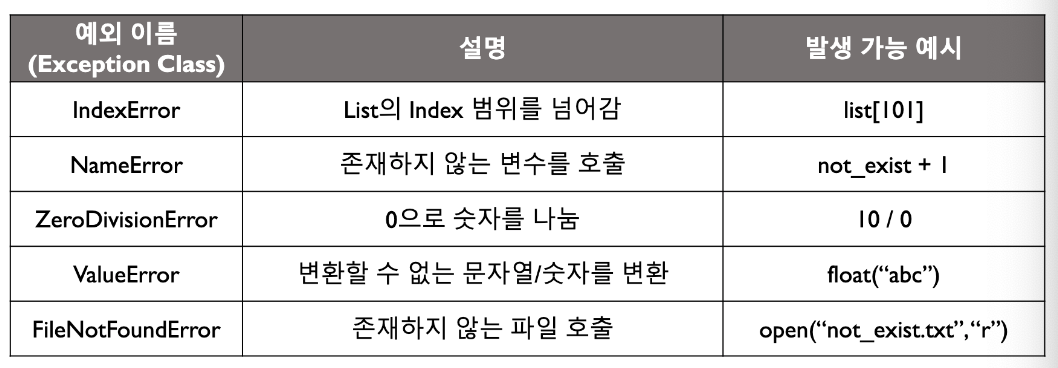

# Exception Class
- 파이썬 예외는 모두 Base Exception 상속한다
- 대부분 try로 최대 Exception단 까지만 잡음
- Exception Class를 상속하여 새로운 예외 생성 가능 
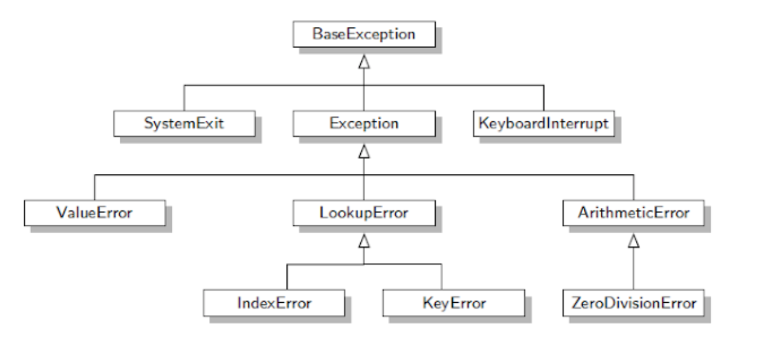

# Raising & Referencing Exceptions
- Raise구문으로 예외 발생 
    - raise <예외객체>
- as구문으로 잡힌 에러를 참조 가능 
    - except <예외클래스> as <예외객체>


In [35]:
while True:
    value = input('A B C 중 하나를 입력하세요 : ')
    if len(value) == 1 and value not in 'ABC':
        pass # Q. 일부러 에러나게 하려면 어떻게 해야할까? 

    print('선택된옵션 :',value)

A B C 중 하나를 입력하세요 : E


In [ ]:
# # Q. 일부러 에러나게 하려면 어떻게 해야할까? 

In [38]:
try:
    while True:
        value = input('A B C 중 하나를 입력하세요.')
        
        if len(value) == 1 and value not in 'ABC':
            raise ValueError('잘못된 입력입니다. 종료합니다.') # 예외발생
    
except ValueError as e:
    print(e)

A B C 중 하나를 입력하세요.R
잘못된 입력입니다. 종료합니다.


# Post-error Processing
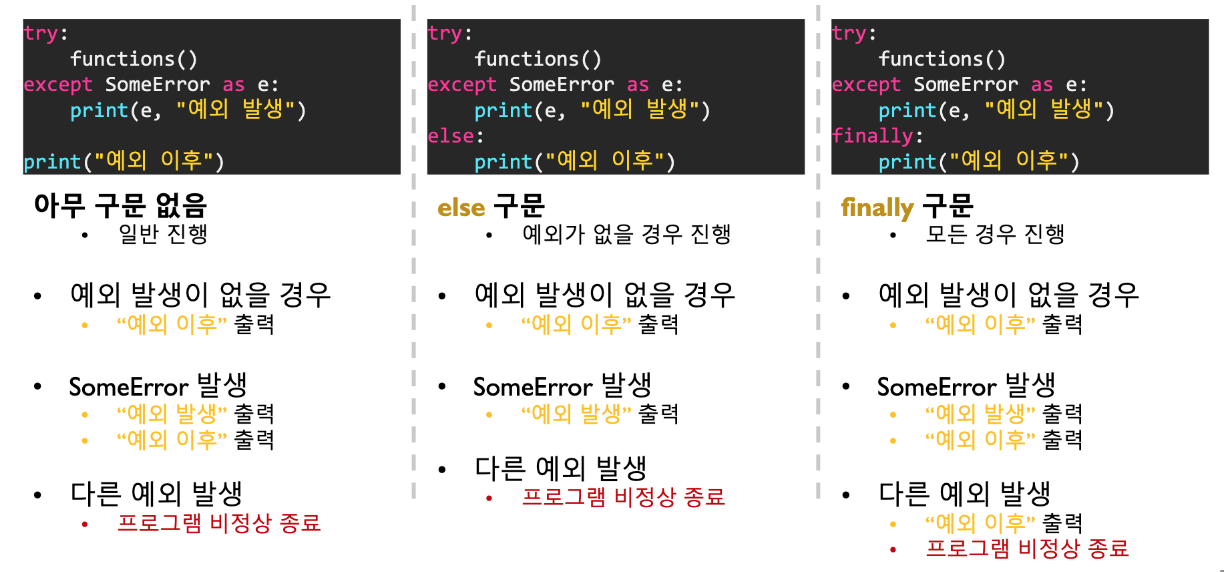

# Exception Handling Example 

# Loggin 
- 프로그램이 일어나는 동안 발생했던 정보를 기록 
    - 결과 처리, 유저접근, 예외 발생 등 
    - 기록된 로그 분석을 통한 디버깅, 유저패턴 파악 
- 기록 용도에 따른 차이
    - 용도에 따라 출력 형식 및 필터링 필요 
- 어떻게 표출할까?
    - 표준에러출력 : 일시적, 기록을 위해선 리다이렉션 필요, 구조화 필요
    - 파일출력 : 반영구적, 매번 file description 을 열고 닫아야함
    

체계적으로 로깅을 할수 없을까? 

# Logging Module
- 파이썬 기본 로깅 모듈 
- 상황에 따라 다른 레벨의 로그 출력
- DEBUG < INFO < WARNING < ERRO < CRITICAL 

In [39]:
import logging

logging.debug('디버깅')
logging.info('정보확인')
logging.warning('경고')
logging.error('에러')
logging.critical('치명적오류')

ERROR:root:에러
CRITICAL:root:치명적오류


# Logging Level 
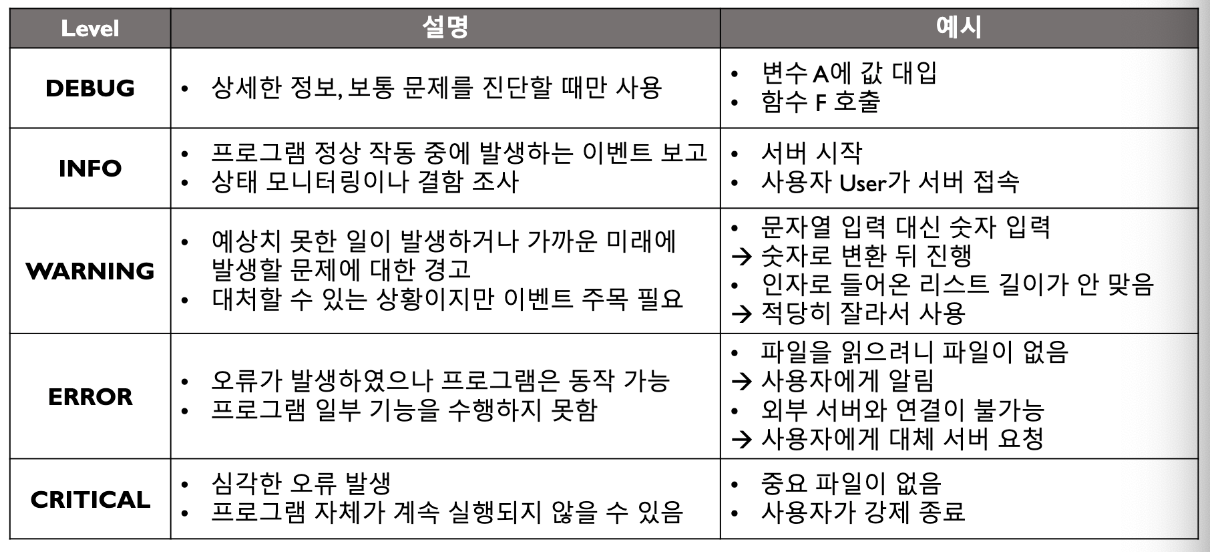

# Root Logging
- 기본 설정된 로깅 : 루트로깅
- Basic config로 간단하게 설정 가능 
    - 로그를 기록할 파일 이름
    - 로그레벨을 설정하여 특정 레벨 이상 출력
- 기본설정
    - 표준에러 출력
    - WARNING 이상 출력 

In [40]:
import logging

logging.basicConfig( # 로깅설정
    filename = 'test.log', # 기록할파일 
    level = logging.INFO,  # 로그레벨
)

logging.debug('이 메세지? 기록 안됨')
logging.info('이 메세지는? 기록 됨')
logging.error('이 메세지는? 기록 됨')

ERROR:root:이 메세지는? 기록 됨


# Logger Management 
- 새로운 로거생성
- getLogger로 새로운 이름 로거 생성가능
    - 이름이 같은 로거가 존재할 경우 해당 객체를 들고 옴 
    - 따로 설정이 되어 있지 않을 경우 루트의 설정을 상속함 

In [ ]:
import logging

logging.basicConfig(
    filename = 'test.log',
)

# logger = logging.getLogger('main') # 새로운 로거생성
logger = logging.getLogger(__name__) # 일반적으로 모듈 별로 이름을 만든다
logger.setLevel(logging.INFO) # 새로거의 레벨 설정 

logging.info('root에 info 기록') # 루트에 기록 
logging.warning('root에 warning 기록')

logger.info('메인에서 info기록') # 새로만든 로거에 기록
logger.warning('메인에서 warning 기록')

In [ ]:
# 루트, 메인 구분은?? 
# 끝! 